In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Analizando la informacion de la base de datos, no se encuentran datos perdidos o inexistentes.

# Discover and Visualize the Data to Gain Insights

In [4]:
corr_matrix = data.corr()
corr_matrix["output"].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

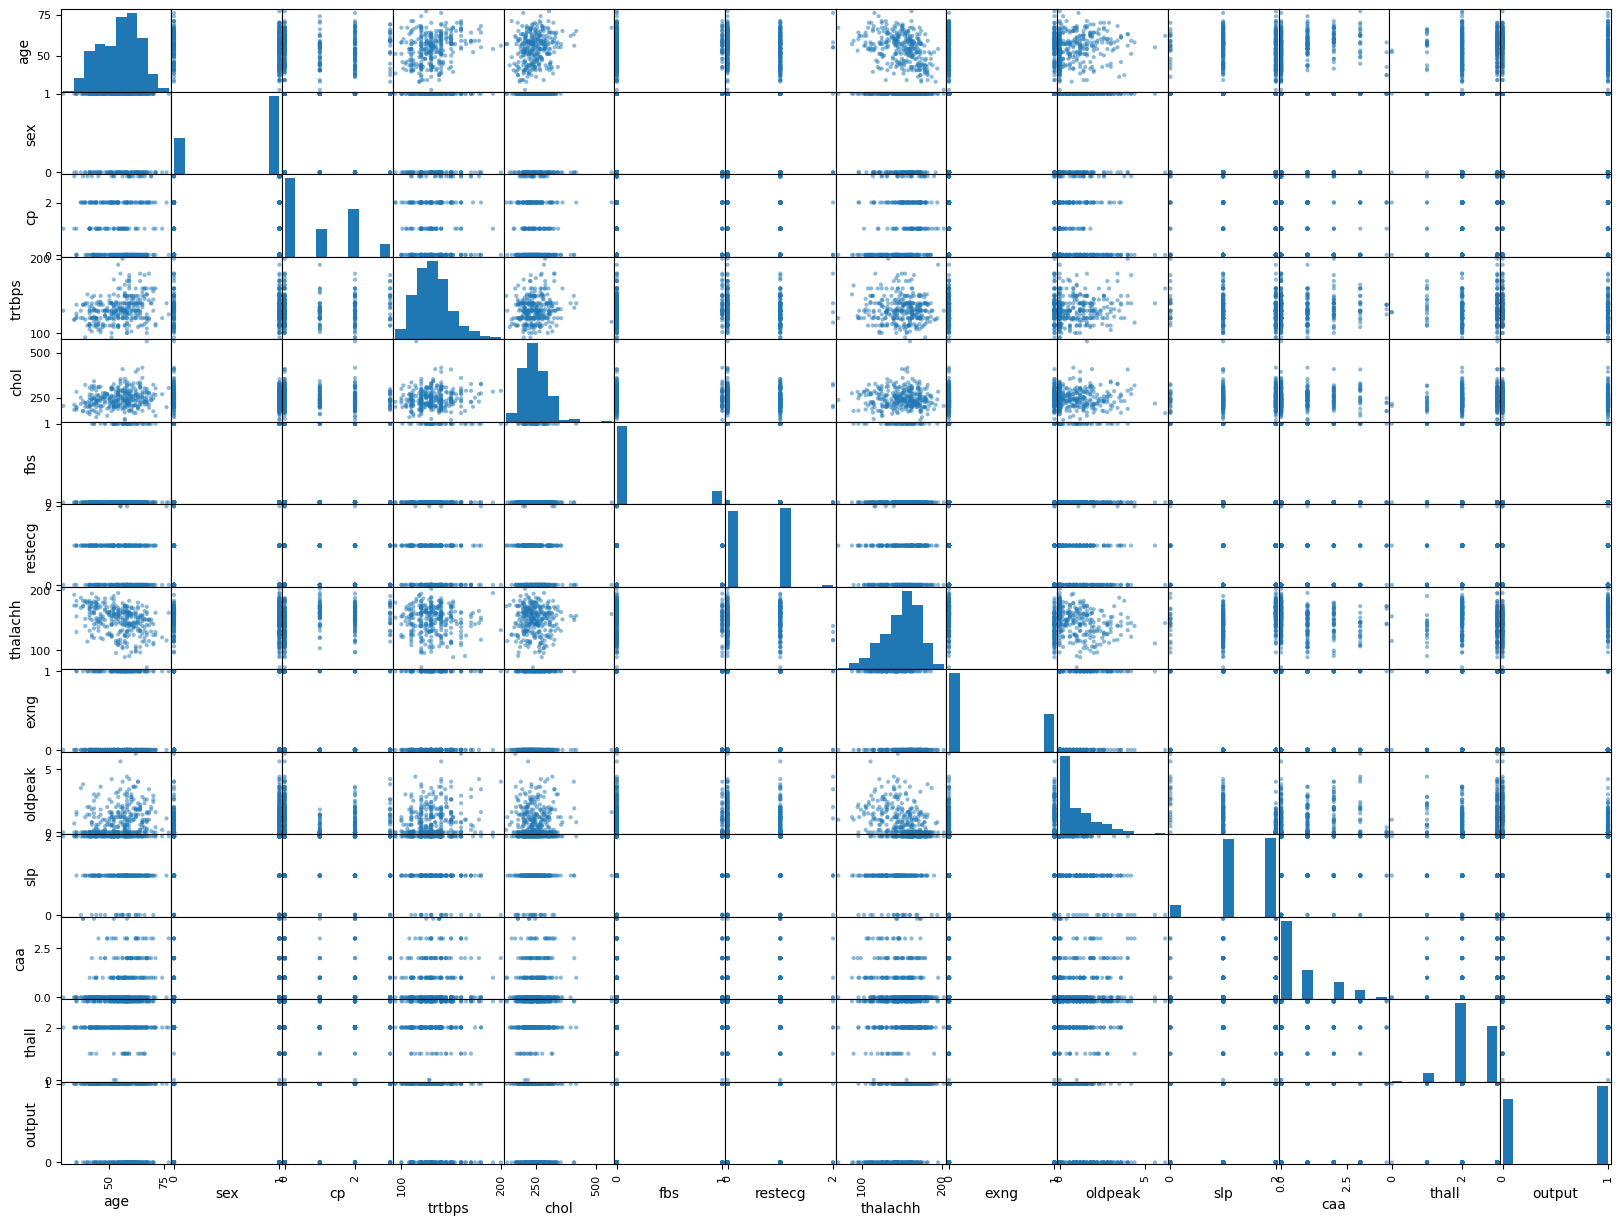

In [5]:
from pandas.plotting import scatter_matrix

attributes = data.columns

scatter_matrix(data[attributes], figsize=(20, 15));

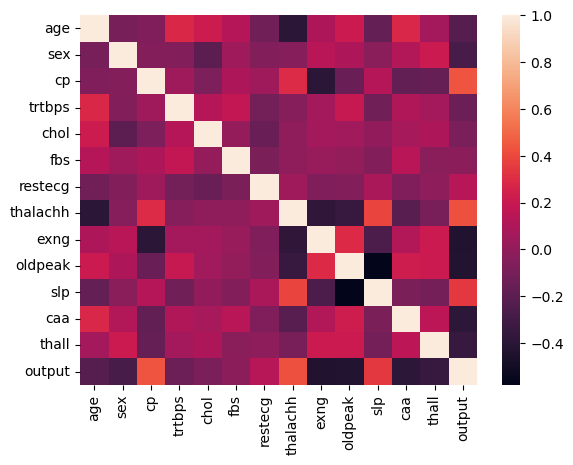

In [6]:
import seaborn as sns

sns.heatmap(corr_matrix);

Vamos a crear una correlacion entre slp & thalachh, para determinar si esta relacion puede ser util a la hora del analisis.

In [7]:
data["thalachh_per_slp"] = data["slp"]/data["thalachh"]
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,thalachh_per_slp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.000000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.000000
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.011628
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.011236
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.012270


In [8]:
corr_matrix = data.corr()
corr_matrix["output"].sort_values(ascending=False)

output              1.000000
cp                  0.433798
thalachh            0.421741
slp                 0.345877
thalachh_per_slp    0.220974
restecg             0.137230
fbs                -0.028046
chol               -0.085239
trtbps             -0.144931
age                -0.225439
sex                -0.280937
thall              -0.344029
caa                -0.391724
oldpeak            -0.430696
exng               -0.436757
Name: output, dtype: float64

Ahora, podemos eliminar columnas que no tienen demasiada correlacion con la salida output.

In [9]:
data2 = data.drop(["trtbps", "chol", "fbs", "restecg"], axis=1)
data2.head()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output,thalachh_per_slp
0,63,1,3,150,0,2.3,0,0,1,1,0.000000
1,37,1,2,187,0,3.5,0,0,2,1,0.000000
2,41,0,1,172,0,1.4,2,0,2,1,0.011628
3,56,1,1,178,0,0.8,2,0,2,1,0.011236
4,57,0,0,163,1,0.6,2,0,2,1,0.012270


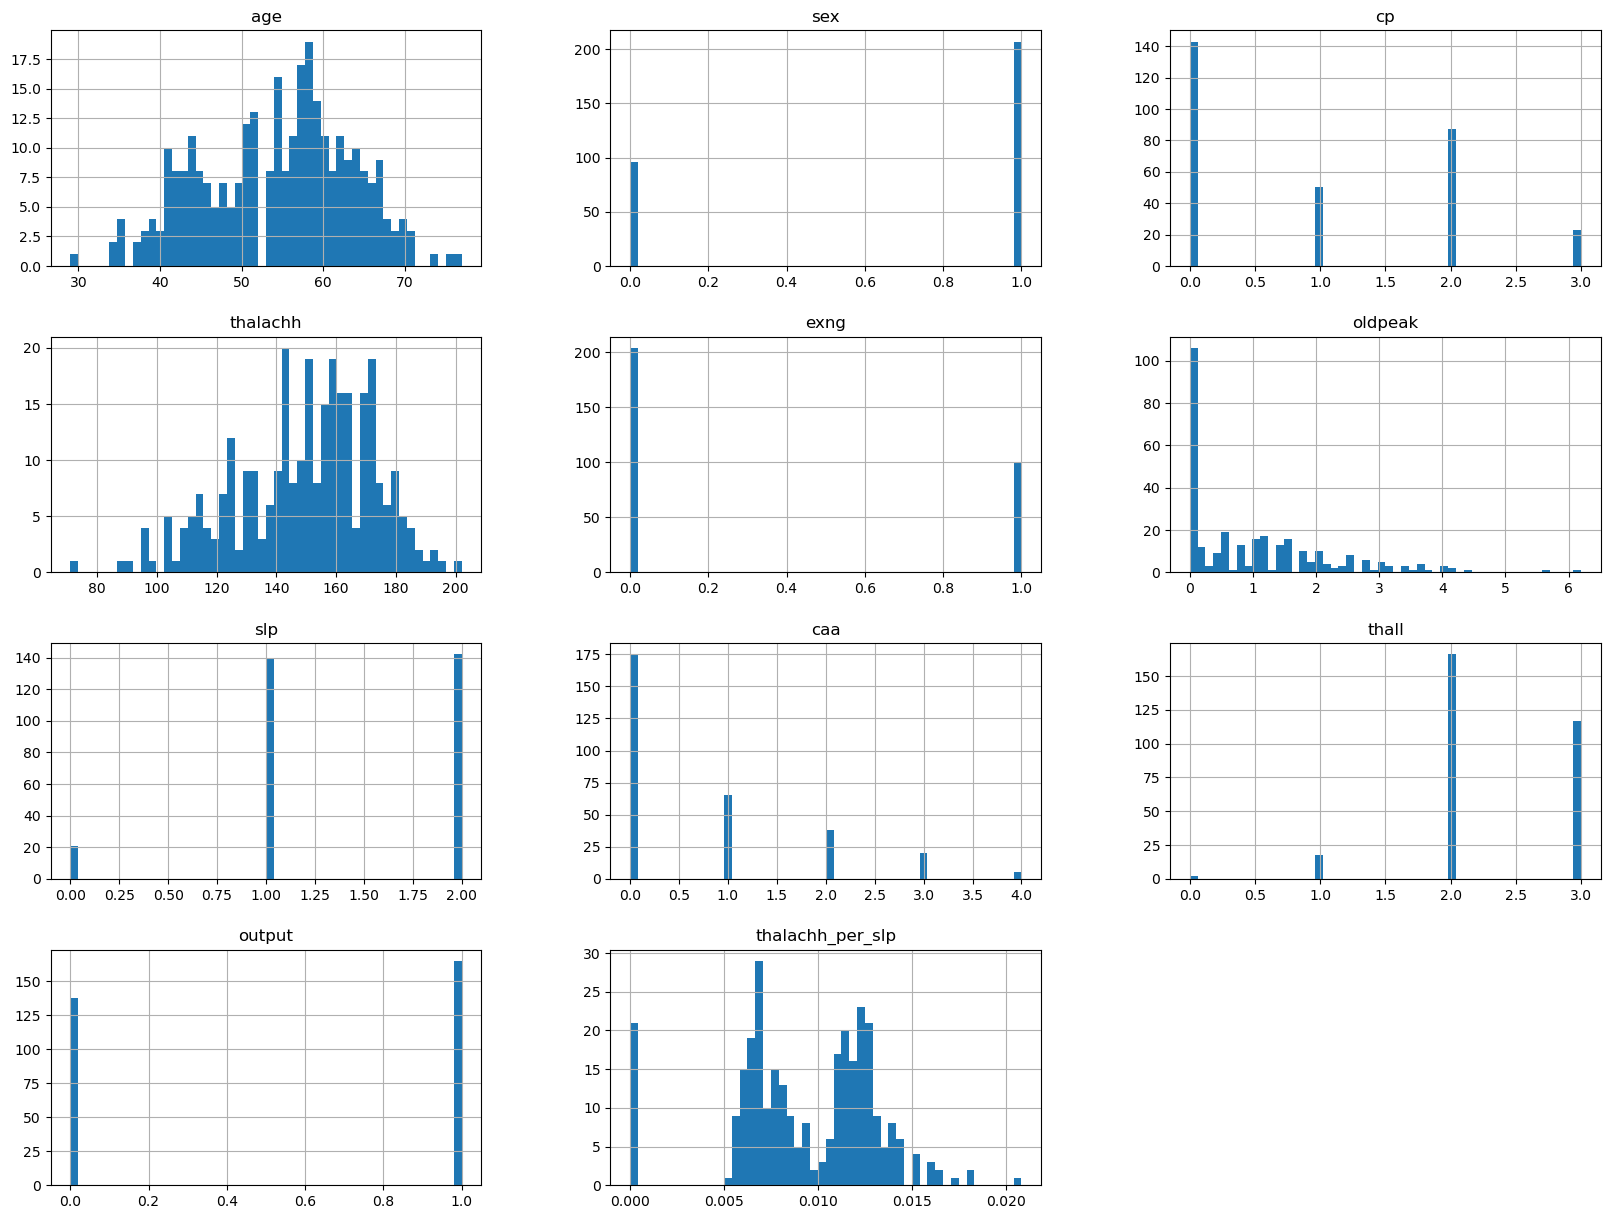

In [10]:
import matplotlib.pyplot as plt

data2.hist(bins = 50, figsize=(20,15));

# Data Cleaning

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

method1_pipeline = Pipeline([
    ("min_max_scaler", MinMaxScaler()),
])

method2_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

In [12]:
data_transformed_1 = pd.DataFrame(method1_pipeline.fit_transform(data2),
                                 columns = list(data2.columns))
data_transformed_1

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output,thalachh_per_slp
0,0.708333,1.0,1.000000,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0,0.000000
1,0.166667,1.0,0.666667,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0,0.000000
2,0.250000,0.0,0.333333,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0,0.558140
3,0.562500,1.0,0.333333,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0,0.539326
4,0.583333,0.0,0.000000,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0,0.588957
...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0,0.390244
299,0.333333,1.0,1.000000,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0,0.363636
300,0.812500,1.0,0.000000,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0,0.340426
301,0.583333,1.0,0.000000,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0,0.417391


In [13]:
# data_transformed_2 = pd.DataFrame(method2_pipeline.fit_transform(data2),
#                                  columns = list(data2.columns))
# data_transformed_2

In [14]:
data3 = data_transformed_1

# Test set

In [15]:
from sklearn.model_selection import train_test_split

split_train_set, split_test_set = train_test_split(data3, test_size=0.2, random_state=42)

In [16]:
split_test_set["output"].value_counts() / len(split_test_set)

1.0    0.52459
0.0    0.47541
Name: output, dtype: float64

In [17]:
split_train_set["output"].value_counts() / len(split_train_set)

1.0    0.549587
0.0    0.450413
Name: output, dtype: float64

In [18]:
data3["output"].value_counts() / len(data3)     

1.0    0.544554
0.0    0.455446
Name: output, dtype: float64

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data3, data3["output"]):
    strat_train_set = data3.loc[train_index]
    strat_test_set =  data3.loc[test_index]

Stratificacion de base de datos de testeo.

In [20]:
strat_test_set["output"].value_counts() / len(strat_test_set)

1.0    0.540984
0.0    0.459016
Name: output, dtype: float64

Stratificacion de base de datos de entrenamiento.

In [21]:
strat_train_set["output"].value_counts() / len(strat_train_set)

1.0    0.545455
0.0    0.454545
Name: output, dtype: float64

Stratificacion de base de datos completa.

In [22]:
data3["output"].value_counts() / len(data3)     

1.0    0.544554
0.0    0.455446
Name: output, dtype: float64

Vamos a comparar los resultados y errores entre la base de datos completa y la de testeo mediante el metodo de split normal y split stratified.

In [23]:
def income_cat_proportions(data, label):
    return data[label].value_counts() / len(data)

label = ["output"]

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data,label),
    "Stratified": income_cat_proportions(strat_test_set,label),
    "Random": income_cat_proportions(split_test_set,label),
}).sort_index()
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Strat. %error,Rand. %error
output,,,,,
0,0.455446,0.459016,0.47541,0.784034,4.383464
1,0.544554,0.540984,0.52459,-0.655738,-3.666170


Se puede observar, en los % de error que el split_stratified contiene un porcentaje de error menor al random, esto quiere decir que este se acerca mas a la base de datos completa.

# Prepare the Data for Machine Learning Algorithms

In [24]:
data_train_set = strat_train_set.drop("output", axis=1)
train_labels = strat_train_set["output"].copy() 

data_test_set = strat_test_set.drop("output", axis=1)
test_labels = strat_test_set["output"].copy() 

# Select and Train a Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(data_train_set, train_labels)

DecisionTreeClassifier(random_state=42)

In [26]:
tree_yhat = tree_clf.predict(data_test_set)

# Evaluación del modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, tree_yhat)
print("Accuracy:", accuracy)

Accuracy: 0.6557377049180327


In [27]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=50, random_state=42)
forest_clf.fit(data_train_set, train_labels)

forest_yhat = forest_clf.predict(data_test_set)

accuracy = accuracy_score(test_labels, forest_yhat)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


In [28]:
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(data_train_set, train_labels)

svm_yhat = svm_clf.predict(data_test_set)

accuracy = accuracy_score(test_labels, svm_yhat)
print("Accuracy:", accuracy)

Accuracy: 0.8032786885245902


In [29]:
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = KNeighborsClassifier(n_neighbors=3)

KNN_clf.fit(data_train_set, train_labels)

KNN_yhat = KNN_clf.predict(data_test_set)

accuracy = accuracy_score(test_labels, KNN_yhat)
print("Accuracy:", accuracy)

Accuracy: 0.8360655737704918


In [30]:
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()

NB_clf.fit(data_train_set, train_labels)

NB_yhat = NB_clf.predict(data_test_set)

accuracy = accuracy_score(test_labels, NB_yhat)
print("Accuracy:", accuracy)

Accuracy: 0.7704918032786885


In [31]:
# REALIZAR GridSearchCV